In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
myDf = pd.read_csv('emp_health.csv')

In [95]:
myDf.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


#### 1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [96]:
myDf_above_50_smoker = myDf[(myDf['age']>50) & (myDf['smoke']=='yes')]

count_50plus_smoker = myDf_above_50_smoker['id'].count()

print('Total number of employee above 50 and smoker :',count_50plus_smoker)

Total number of employee above 50 and smoker : 64


In [97]:
avg_exp_50plus_smoker = myDf_above_50_smoker['expenditure'].mean()

print('Average expenditure on health management of employees above 50 and smoker:',round(avg_exp_50plus_smoker,2))

Average expenditure on health management of employees above 50 and smoker: 38820.22


#### 2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

In [98]:
myDf_female_non_alchol = myDf[ myDf['alcohol']!='daily' ]

count_female_non_alcohol = myDf_female_non_alchol['id'].count()

print('Total number of female not having alcohol daily : ',count_female_non_alcohol)

Total number of female not having alcohol daily :  943


In [99]:
count_all_female =myDf[myDf['sex']=='female']['id'].count()

print('Proportion of non-daily alochol consumer female employees to all female employees is :',
      round((count_female_non_alcohol/count_all_female),2))

Proportion of non-daily alochol consumer female employees to all female employees is : 1.42


#### 3. Display zone wise average expenditure of employees on health

In [101]:
myDf.groupby(['zone'])['expenditure'].mean().to_frame()

,expenditure
zone,
east,13774.679941
north,14102.583403
northeast,13694.721724
northwest,12151.702619
south,14715.689519
southeast,14452.949680
southwest,12717.083869
west,12182.998872


#### 4. Employees of which zone did maximum expenditure on health

In [102]:
myDf.groupby('zone')['expenditure'].mean().sort_values(ascending = False).to_frame().head(1)

,expenditure
zone,
south,14715.689519


#### 5. What is the minimum expenditure done by any employee in organization

In [103]:
print('Minimum expenditure amont by an employee: ',round(myDf['expenditure'].min(),2))

Minimum expenditure amont by an employee:  1121.87


#### 6. What is average expenditure of employees who have 2 or lesser dependents

In [108]:
myDf2dep = myDf[myDf['dependent']<=2]

avg_exp = myDf2dep['expenditure'].mean()

print('Average Expenditure of employees having 2 or less than 2 dependents :',round(avg_exp,2))

Average Expenditure of employees having 2 or less than 2 dependents 13040.97


#### 7. How many employees are below age of 20 years. What is their average BMI

In [112]:
myDf_below20 = myDf[ myDf['age']<20 ]

avg_bmi = myDf_below20['bmi'].mean()

print('Average bmi of employees with age less than 20 :',round(avg_bmi,2))

Average bmi of employees with age less than 20 : 29.97


#### 8. Create a dataframe "non_smoker" for all non-smoker male employees

In [116]:
non_smoker = myDf[(myDf['smoke']=='yes') & (myDf['sex']=='male')]

non_smoker.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
14,i10026,27,male,42.13,0,weekend,yes,south,39611.75770
19,i10031,30,male,35.30,0,daily,yes,southwest,36837.46700
29,i10041,31,male,36.30,2,daily,yes,southwest,38711.00000
30,i10042,22,male,35.60,0,daily,yes,southwest,35585.57600
34,i10046,28,male,36.40,1,party,yes,southwest,51194.55914


#### 9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [119]:
non_alcoholic = myDf[(myDf['alcohol']=='no') & (myDf['sex']=='male')]
non_alcoholic.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630


#### 10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol
####  (Hint:Use join and dataframes created in Q8 and Q9)

In [126]:
non_smoking_alcoholic = myDf[(myDf['smoke']=='no') & (myDf['alcohol']=='no')][['id','smoke','alcohol']]

non_smoking_alcoholic.head()

,id,smoke,alcohol
5,i10017,no,no
9,i10021,no,no
18,i10030,no,no
24,i10036,no,no
28,i10040,no,no


#### 11.What is the count for each zone with respect to number of dependent

In [129]:
myDf.head()

myDf.groupby('zone')['dependent'].sum().to_frame()

,dependent
zone,
east,254
north,85
northeast,86
northwest,143
south,85
southeast,211
southwest,275
west,326


#### 12. Classify the employees into 3 categories.
#### Category 1 : employees below 18.5 bmi - underweight
#### Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit 
####  Category 3 : employee with bmi over 24.9 - overweight
#### What is the average expenditure of employees in each category. 
####  Display the bar chart for the same 


In [154]:
myDf_temp = myDf

myDf_temp['categories'] =['underweight' if x<18.5 else 'fit' if x<=24.9 else 'overweight' for x in myDf['bmi']]

myDf_temp[['bmi','categories']].head()

myDf_temp.groupby('categories')['expenditure'].mean().to_frame()

,expenditure
categories,
fit,10379.499732
overweight,13936.616823
underweight,8852.200585


<ipython-input-156-50db513efe40>:17: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = emp, height = avg_exp, width =0.4 ,color ='rgb' )


Text(0, 0.5, 'Average expenditure ')

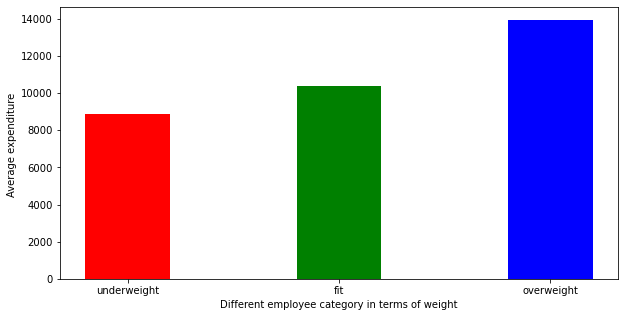

In [156]:
underweight = myDf[myDf['bmi']<18.5]

fit = myDf[(myDf['bmi']>=18.5) & (myDf['bmi']<=24.9)]

overweight = myDf[myDf['bmi']>24.9]

avg_exp_uw = underweight['expenditure'].mean()

avg_exp_f = fit['expenditure'].mean()

avg_exp_ow = overweight['expenditure'].mean()

emp =['underweight','fit','overweight']
avg_exp=[avg_exp_uw,avg_exp_f,avg_exp_ow]

plt.figure(figsize=(10,5))
plt.bar(x = emp, height = avg_exp, width =0.4 ,color ='rgb' )
plt.xlabel('Different employee category in terms of weight')
plt.ylabel('Average expenditure ')

#### 13. Draw line plot of expenditure against age and BMI

<AxesSubplot:xlabel='expenditure'>

<Figure size 720x360 with 0 Axes>

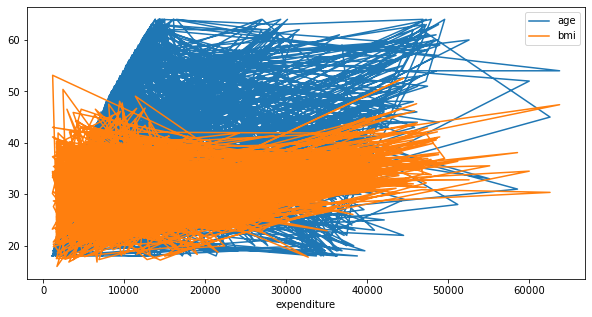

In [315]:
plt.figure(figsize=(10,5))
myDf.plot(x ='expenditure',y=['age','bmi'],figsize=(10,5))

#### 14. Draw a bar chart to show zone wise average expenditure

<AxesSubplot:xlabel='zone'>

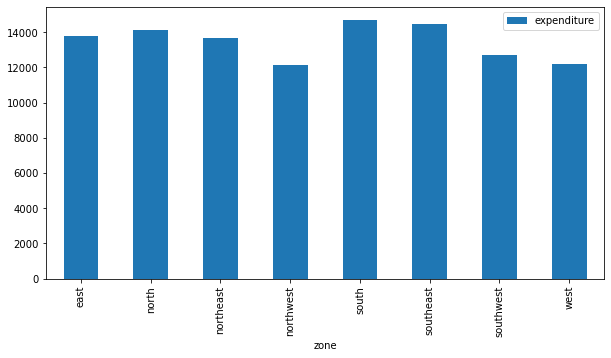

In [257]:
myDf.pivot_table(index ='zone',values='expenditure', aggfunc='mean').plot.bar(figsize=(10,5))


#### 15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

<AxesSubplot:xlabel='alcohol'>

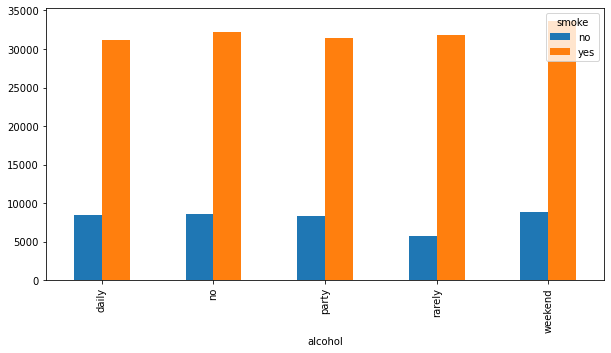

In [258]:
myDf.pivot_table(index='alcohol',columns='smoke',values='expenditure',aggfunc='mean').plot.bar(figsize=(10,5))

#### 16. Draw pie chart for alcohol consumption habits

([<matplotlib.patches.Wedge at 0x2adec9e5430>,
 [Text(0.7798382487113772, 1.0401212938147033, 'daily'),
  Text(-0.9797551770757736, 0.5000797866273137, 'weekend'),
  Text(-0.5984529219141539, -0.9229594250303812, 'rarely'),
  Text(0.6964591150961473, -0.8514368449858696, 'party'),
  Text(1.089461966245801, -0.15189675475082812, 'no')],
 [Text(0.4799004607454629, 0.6400746423475097, '29.52%'),
  Text(-0.5344119147686037, 0.2727707927058074, '25.93%'),
  Text(-0.3264288664986294, -0.5034324136529351, '20.78%'),
  Text(0.37988679005244397, -0.4644200972650197, '19.36%'),
  Text(0.5942519815886187, -0.08285277531863351, '4.41%')])

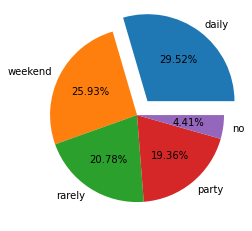

In [282]:
plt.pie(myDf['alcohol'].value_counts(),autopct='%.2f%%',labels=myDf['alcohol'].unique(),explode=[0.2,0,0,0,0])

#### 17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

<AxesSubplot:xlabel='age', ylabel='expenditure'>

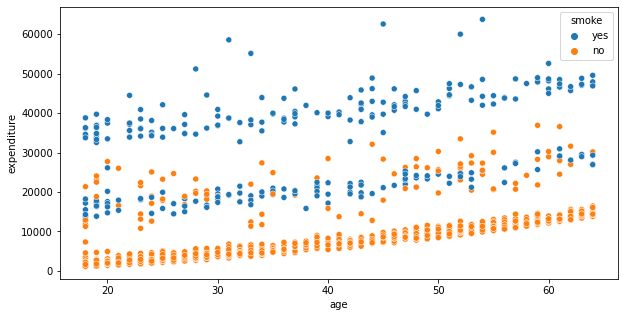

In [271]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=myDf['age'],y=myDf['expenditure'],hue=myDf['smoke'])

#### 18. Draw distribution plot of expenditure

C:\Users\Anjum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

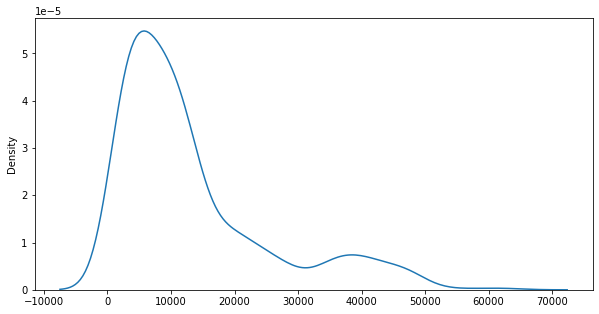

In [286]:
plt.figure(figsize=(10,5))
sns.distplot(x=myDf['expenditure'],hist= False)

#### 19. Display the pairplot

<Figure size 720x360 with 0 Axes>

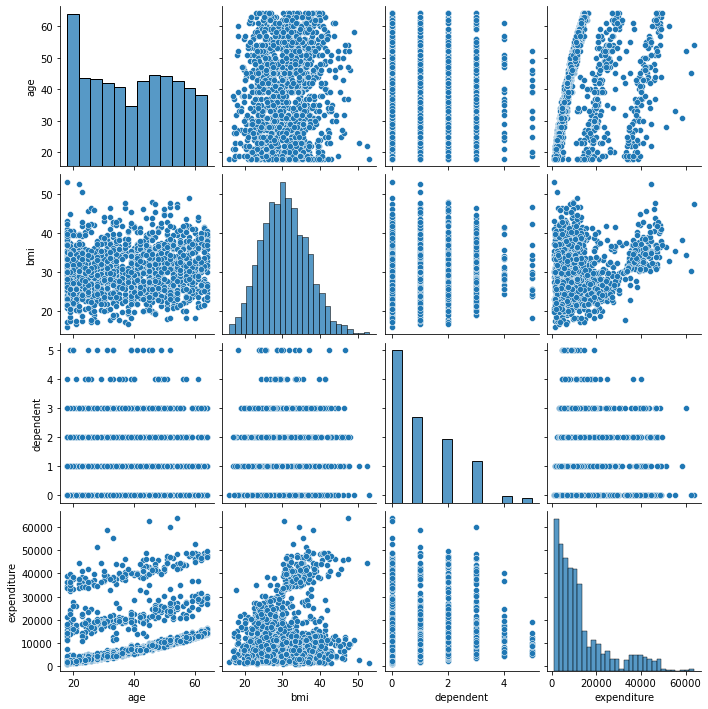

In [291]:
plt.figure(figsize=(10,5))
sns.pairplot(myDf)

#### 20. Display heatmap for the data

<AxesSubplot:xlabel='age', ylabel='smoke-alcohol'>

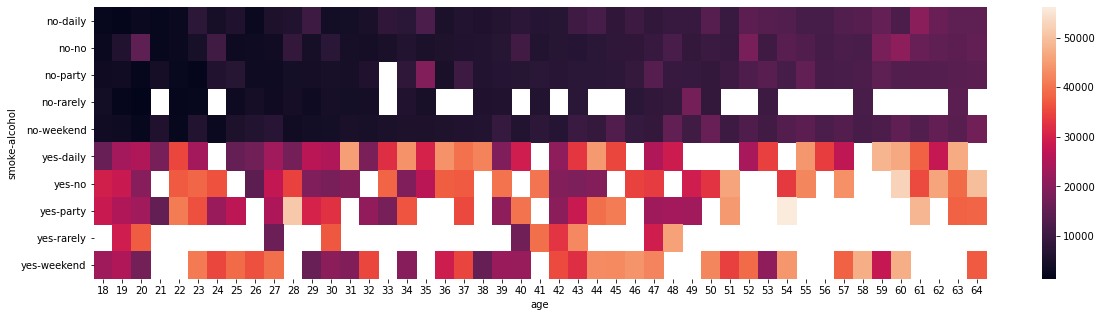

In [302]:
myDf_pivot = myDf.pivot_table(index=['smoke','alcohol'],columns='age',values='expenditure',aggfunc='mean')
plt.figure(figsize=(20,5))
sns.heatmap(myDf_pivot)